# Supplement to Lecture 7.2: ARIMA, SARIMA, ETS

## Outline

* Define key time series concepts and properties
* Describe ARIMA model
* Use Box-Jenkins work-flow to estimate an ARIMA model
    * Use graphical tools to pick an ARIMA model
    * Estimate/forecast/evaluate an ARIMA model
    * Model selection

## Objectives  

* Define key time series concepts
* Use graphical tools to analyze time series data
* Train and evaluate ARIMA models using Python’s StatsModels

## References  

Some helpful references, arranged by increasing difficulty:  

* Hyndman & Athanasopoulos: “[Forecasting: principles and practice](https://www.otexts.org/fpp)”
* Enders: “Applied Econometric Time Series”
* Hamilton: “Time Series Analysis”

## Time Series Data  

Time series data is a sequence of observations of some quantity of interest, which are collected over time, such as:  

* GDP
* The price of toilet paper or a stock
* Demand for a good
* Unemployment
* Web traffic (clicks, logins, posts, etc.)

### Definition  

We assume a time series, $\{y_t\}$, has the following properties:  

* $y_t$ is an observation of the level of $y$ at time $t$
* $\{y_t\}$ is time series, i.e., the collection of observations:
    * May extend back to $t = 0$ or $t = −\infty$, depending on the problem.
    * E.g., $t \in \{0, \dots, T\}$

### Assumptions  

We assume:  
* Discrete time:
    * Sampling at regular intervals
    * even if process is continuous
* Evenly spaced observations
* No missing observations

### Components of a time series  

Think of a time series as consisting of several different components:  
* Trend
* Seasonality
* Cyclic
* Irregular

Can be additive or multiplicative

### Example decomposition from Hyndman et al.  

<img src="images/ts_decomposition.png" width="600">  

### Example time series from Hyndman et al.  

<img src="images/ts_examples.png" width="600">  

## Two popular models  

* ARIMA(p,d,q):
    * Captures key aspects of time series data  
    
* Exponential smoothing (ETS):
    * Smooths out irregular shocks to model trend and seasonality
    * Updates forecast with linear combination of past forecast and current value

### Notation  

* $y_t$ : the level of some value of interest at time $t$
* $\varepsilon_t$ : the value of a shock, $\varepsilon$, at time $t$
* $\hat{y}_{t+h|t}$ is the forecast for $y_{t+h}$ based on the information available at time $t$

## ARIMA Models  

The Box-Jenkins Methodology applies autoregressive moving average models to find the best fit of a time series based on past values.  

**3-stage approach**:  
1. Model Identification
    * Making sure data is stationary
    * Identifying seasonality
    * Using plots of autocorrelation (ACF) and partial autocorrelation (PACF) to decide which autoregressive and/or moving average components to include
2. Parameter Estimation via MLE or non-linear least squares
3. Model Checking by testing the model residuals  

If estimation is inadequate, we return to step 1 and iterate.

### Stationary Time Series  

A stationary time series is one for which the statistical behavior of a set of observations $y_{t_1}, y_{t_2}, \dots, y_{t_k}$ is identical to that of the shifted set of observations $y_{t_{1+h}}, y_{t_{2+h}}, \dots, y_{t_{k+h}}$ for any collection of time points $t_1, t_2, \dots, t_k$ and for any shift $h$ (lag).  

This is the definition of strong stationarity and is too strong for most applications.  

### Weak Stationarity  

There is a relaxed definition, referred to as weak stationarity which requires only that the first and second moments satisfy the following constraints:  


$$ E(y_t) = \mu \text{ for all } t $$  


$$ \gamma_y (h) = E[(y_{t+h} - \mu)(y_t 􀀀- \mu)] $$  

where $E$ is the usual expectation over the population density, $h$ is the time shift (lag), and  $\gamma_y (h)$ is called the *autocovariance function* and we additionally assert that  

$$\gamma_y (h) = \gamma_y (-􀀀h) $$  

In general, a stationary time series will have no predictable patterns in the long-term. 

### ACF and PACF  

* Autocorrelation Function (ACF)  
    * Measures correlation at adjacent points of the same series  
    
    $$ \rho_y (h) = \frac{\gamma_y (h)}{\gamma_y (0)} $$  
    
    $$ -1 < \rho_y (h) < 1 $$  
    
* Partial Autocorrelation Function (PACF)  
    * On can think of the PACF as the simple correlation between two points separated by a lag $h$, say $y_t$ and $y_{t-􀀀h}$, with the effect of the intervening points $y_{t-􀀀1}, y_{t-􀀀2}, \dots, y_{t-􀀀h+1}$ conditioned out.

### Nonstationarity  

So time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.  

Most time series are not stationary to begin with, so need to modify the series to improve the approximation of stationarity by  

* Detrending
* Differencing
* Transformations 

### Detrending  

The general version of a nonstationary time series is to assume
a general linear trend of the form  

$$ y_t = \beta_0 + \beta_1 t + \varepsilon_t  $$  

The natural thing to do is to consider the residual  

$$\hat{e}_t = y_t - \hat{\beta}_0 - \hat{\beta}_1 t $$  

as a plausible stationary series where $\beta_0$ and $\beta_1$ are the estimated intercept and slope coefficients based on least squares estimation.

### Differencing  

A common first step for achieving stationity is with the first difference
$$ \nabla  y_t = y_t 􀀀- y_{t-􀀀1} $$  


$ \nabla  y_t$ is useful for series with trend.    

Higher order differences are defined as successive applications of the operator 5. For example, the second difference is  

$$ \nabla^2 y_t = \nabla[\nabla y_t] = [y_t - y_{t - 1}] - [y_{t - 1} - y_{t - 2}] $$  

If the model also contains a quadratic trend term, $ \nabla^2 y_t$ usually
reduces the model to a stationary form.

### Example: Global Temperatures  

Consider a global temperatures series: the data are a combination
of land-air average temperature anomalies for the years 1900-1997.  

<img src="images/global_temp.png" width="600">  

We first look at detrending the time series and examine the residuals from the model  

$$ \hat{Temp} = -􀀀12.2 + 0.006 \times Years $$  

<img src="images/global_detrend.png" width="600"> 

Next, look at differencing the time series with the first difference  

<img src="images/global_diff.png" width="600"> 

### Transformations  

A transformation that cuts down the values of larger peaks of a
time series and emphasizes the lower values may be effective in
reducing nonstationary behavior due to changing variance.  

Examples:  

* The logarithmic transformation, $log (y_t )$ usually exponential-base (natural log)
* The square root transformation, $\sqrt{y_t}$, useful for count data  
* More general transformations fall within the Box-Cox family

### Example: Johnson & Johnson Data  

The following figures shows quarterly earnings per share for
Johnson&Johnson from 1960 to 1980 before and after a log
transformation.  

<img src="images/johnson_example.png" width="600"> 

### Assessing Stationarity  

Box-Jenkins models describe stationary time series, so we must
determine if the series is stationary and if not, transform it to
attain stationarity.  

We can use the ACF to determine if the time series is stationary    

* If the ACF dies down quickly (relatively few significant lags) we can consider the series stationary
* If it dies down slowly then we need to try some transformations to either remove the trend or stabilize the variance
* We will then use the new transformed series as the "working" time series for the remainder of the analysis  

### ARIMA introduction  

* ARIMA(p,d,q) consists of: 
    * AR(p): persistence of history through AR terms
    * I(d): trend
    * MA(q): influence of past shocks through MA terms
* Can add higher order lags for seasonality

#### AR(p)  

AR(p) means auto-regressive of order p:  

$$ y_t = \phi_1  y_{t−1} + \dots + \phi_p  y_{t−p} + \varepsilon_t $$

#### MA(q)  

An MA(q) model captures the persistence of past shocks.  

MA(q) means moving average of order q:  

$$ y_t = \varepsilon_t +  \theta_1  \varepsilon_{t−1} + \dots + \theta_q \varepsilon_{t - q} $$

#### I(d)   

An I(d) model captures the non-stationary trend.  

* I(d) means integrated of order d:
$$ y_t = y_{t−1} + \mu + \varepsilon_t $$  
* d is how many times you must difference the series so that it is stationary
* Usually, $d \in {0, 1, 2}$
* Differencing should remove the trend component
* Compute differences with `np.diff(n=d)` or `pd.Series.diff(periods=d)`

### ARIMA models  

An ARIMA(p,d,q) is a general model which includes AR, I, and MA:  

* AR(p): AR of order p
* I(d): I of order d
* MA(q): MA of order q  

Remarks:
* AR, I, and/or MA may be missing from a general ARIMA model
* May also include seasonal components . . . Specify as ARIMA(p,d,q)(P,D,Q)
* If d = 0 $\Rightarrow$ ARIMA becomes ARMA

### Box-Jenkins Method  

General Steps:
* Identify the steps needed to achieve stationarity (detrending,
differencing, and/or transformations)
* Utilize ACF to see if stationarity is achieved. Lags should die
down quickly.
* Use ACF/PACF to identify potential models by where the lags
cut off.
    * PACF identifies AR(p)
    * ACF identifies MA(q)
* Fit model and examine residuals
    * If white noise, you're done
    * Else, identify additional components and update model

In [1]:
%pylab inline
import pandas as pd
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)

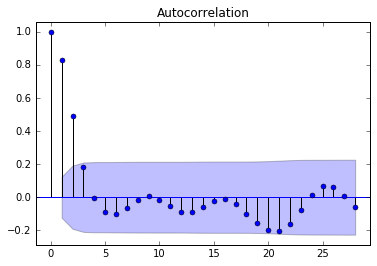

In [3]:
sm.graphics.tsa.plot_acf(y, lags=28, alpha=0.05);

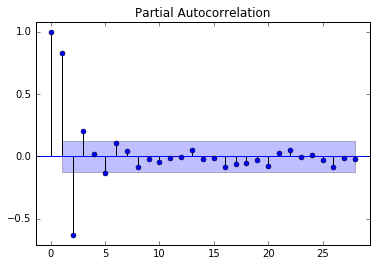

In [4]:
sm.graphics.tsa.plot_pacf(y, lags=28, alpha=0.05);

In [5]:
data = sm.datasets.macrodata.load_pandas()
df = data.data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
y = df.m1
X = df[['realgdp', 'cpi']]
model = sm.tsa.ARIMA(endog=y, order=[1,1,1])
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 1539.7400 
Dependent Variable: D.m1             Log-Likelihood:      -759.25   
Date:               2016-10-04 11:13 Scale:               1.0000    
No. Observations:   202              Method:              css-mle   
Df Model:           3                Sample:              06-30-1959
Df Residuals:       199                                   09-30-2009
Converged:          1.0000           S.D. of innovations: 10.364    
AIC:                1526.5069        HQIC:                1531.861  
----------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const         7.9682     2.5951    3.0705   0.0024    2.8820   13.0544
ar.L1.D.m1    0.8290     0.0613   13.5210   0.0000    0.7088    0.9491
ma.L1.D.m1   -0.3806     0.0931   -4.0905   0.0001   -0.5630   -0.1983
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.2063             0.0000           1.2063             0.0000
MA.1            2.6272             0.0000           2.6272             0.0000
====================================================================

"""

In [6]:
y_hat, stderr, pred_int = results.forecast(steps=10, alpha=0.05)
y_hat

array([ 1699.86834437,  1722.75810998,  1743.09582822,  1761.31797748,
        1777.78638493,  1792.80099422,  1806.61044941,  1819.42086884,
        1831.40311824,  1842.69884011])

### Seasonal ARIMA  

Seasonal ARIMA (or SARIMA(p,d,q)x(P,D,Q)xL) are an extension
of ARIMA(p,d,q) models to address seasonality.  

Methods used are identical to those above except we focus on the
seasonal lags (L) including taking a seasonal difference $\nabla^D$ which is the difference in the seasonal lags.  

For Example:
* If quarterly data, we would focus on lags: 4, 8, 12, etc
* If monthly data, we would focus on lags: 12, 24, 36, etc
* If daily data, we might focus on lags: 7, 14, 21, etc
* If hourly data, we might focus on lags: 24, 48, 72, etc  

We can fit seasonal ARIMA model using `statsmodels.tsa.SARIMAX` in Python.